**Prbolem Statement:**
Take a small image dataset (400-500 images with at least 224X224X3 pixels or more). The dataset must have 4 to 5 classes of images. Find the final features of those images using pre-trained ResNet-101. Take one image from each class, then find the ten nearest neighbors of that image (using the final image embedding)  from all the images. Do the same for AlexNet and compare the results. 

**Group members list**


*   **Member 1:** M. Zanibul Haque Shanto (1921089042)  
*   **Member 2:** Md Shawmoon Azad (1912374042)
*   **Member 3:** Md. Sajjad Hossain (1922000042)
*   **Member 4:** Mohammed Rakibul Hasan (1921798042)








**Summarry of the results:** 
As mentioned in the problem statement we have taken a small dog dataset of 455 images which contains 5 classes. Then we used prestarined ResNet101 to extract the final features. Then we have used image embedding to find the 10 nearest images. we have taken help from Deeplake'Hub' for the final image embedding. Using the Hub API the final result we have go is that for 1 chihuahua image we have got 10 similar images of chihuahua as a result.

# Installing Libraires

In [ ]:
!pip install hub
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 404 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 49.0 MB/s 
     |████████████████████████████████| 79 kB 7.4 MB/s 
     |████████████████████████████████| 6.7 MB 39.2 MB/s 
     |████████████████████████████████| 79 kB 4.2 MB/s 
     |████████████████████████████████| 10.3 MB 34.3 MB/s 
     |████████████████████████████████| 140 kB 44.4 MB/s 
     |████████████████████████████████| 52 kB 685 kB/s 
     |████████████████████████████████| 132 kB 44.2 MB/s 
     |████████████████████████████████| 127 kB 44.4 MB/s 
  Created wheel for deeplake: filename=deeplake-3.1.5-py3-none-any.whl size=489424 sha256=8f4a81158cbc9e7c3623585017b93ea3940f295d9248e27d9e9e57d995bdf02f
  Stored in directory: /root/.cache/pip/wheels/e7/ca/54/d118b254f85536e95e27056f1381b7bd43a2f46b208869cf66
Successfully built deeplake
  Attempting uninstall: urllib3
    F

# Importing Libraries

In [ ]:
import numpy as np
import hub
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch
from torchsummary import summary
import torchvision.models as models
import glob
from tqdm import tqdm
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset

Loading Dataset from the GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis

In [ ]:
# Viewing the dataset folder
!ls /content/drive/MyDrive/data/Dataset_Dogs

chihuahua  corgi  dachshund  labrador  pug


In [ ]:
data_dir = '/content/drive/MyDrive/data/Dataset_Dogs'

In [ ]:
list_imgs = glob.glob(data_dir + "/**/*.jpg")
print(f"There are {len(list_imgs)} images in the dataset {data_dir}")

There are 455 images in the dataset /content/drive/MyDrive/data/Dataset_Dogs


In [ ]:
# create dataloader with required transforms 
tc = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()              
    ])

image_datasets = datasets.ImageFolder(data_dir, transform=tc)
dloader = torch.utils.data.DataLoader(image_datasets, batch_size=10, shuffle=False)

torch.Size([256, 256, 3])
tensor([[[0.0118, 0.0157, 0.0157,  ..., 0.1882, 0.1922, 0.1922],
         [0.0118, 0.0157, 0.0157,  ..., 0.1922, 0.1961, 0.1961],
         [0.0118, 0.0157, 0.0196,  ..., 0.1961, 0.1961, 0.1961],
         ...,
         [0.0392, 0.0353, 0.0392,  ..., 0.4314, 0.3725, 0.3569],
         [0.0314, 0.0392, 0.0392,  ..., 0.5529, 0.4275, 0.3922],
         [0.0275, 0.0353, 0.0196,  ..., 0.5255, 0.4392, 0.3843]],

        [[0.0118, 0.0157, 0.0157,  ..., 0.2902, 0.2941, 0.2941],
         [0.0118, 0.0157, 0.0157,  ..., 0.2941, 0.2980, 0.2980],
         [0.0118, 0.0157, 0.0196,  ..., 0.2941, 0.2941, 0.2941],
         ...,
         [0.0627, 0.0627, 0.0627,  ..., 0.4510, 0.3765, 0.3451],
         [0.0588, 0.0549, 0.0667,  ..., 0.5412, 0.4118, 0.3843],
         [0.0549, 0.0471, 0.0549,  ..., 0.5098, 0.4196, 0.3882]],

        [[0.0118, 0.0157, 0.0157,  ..., 0.1490, 0.1529, 0.1451],
         [0.0118, 0.0157, 0.0157,  ..., 0.1569, 0.1608, 0.1529],
         [0.0118, 0.0157, 0.0196

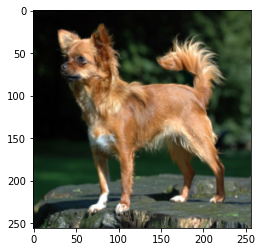

In [ ]:
for img, label in dloader:
  print(np.transpose(img[0], (1,2,0)).shape)
  print(img[0])
  plt.imshow((img[0].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
  plt.show()
  break

Pytorch default backend for images are Pillow, and when you use ToTensor()class, PyTorch automatically converts all images into [0,1] so no need to normalize the images here.


In [ ]:
len(image_datasets)

455

## Generate embeddings

In [ ]:
def copy_embeddings(m, i, o):
    """Copy embeddings from the penultimate layer.
    """
    o = o[:, :, 0, 0].detach().numpy().tolist()
    outputs.append(o)

# Fetching Pretrained Resnet101 model

In [ ]:

model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:

layer = model._modules.get('avgpool')

_ = layer.register_forward_hook(copy_embeddings)

In [ ]:
outputs = [] 

model.eval() 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Generating Image Embaddings

In [ ]:
for X, y in dloader:
    _ = model(X)

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
len(outputs)

46

In [ ]:
# flatten list of embeddings to remove batches
list_embeddings = [item for sublist in outputs for item in sublist]
print(len(list_embeddings))

455


In [ ]:
assert len(list_embeddings) == len(image_datasets)

In [ ]:
np.array(list_embeddings[0]).shape

(2048,)

In [ ]:
#Sending to Hub using API
!activeloop login -u shawmoon -p activeloop786

Successfully logged in to Activeloop.


In [ ]:
#Creating a New Hub folder
with hub.empty('./dog_deeplake') as ds:
    # Create the tensors 
    ds.create_tensor('images', htype = 'image', sample_compression = 'jpeg')
    ds.create_tensor('embeddings')

    
    ds.info.update(description = 'Dog breeds embeddings dataset')
    ds.images.info.update(camera_type = 'SLR')
    
    # Iterate through the images and their corresponding embeddings, and append them to hub dataset
    for i in tqdm(range(len(image_datasets))):
      img = image_datasets[i][0].detach().numpy().transpose(1, 2, 0)
      img = img * 255 # images are normalized
      img = img.astype(np.uint8)
      ds.images.append(img)  # Append to Hub Dataset
      ds.embeddings.append(list_embeddings[i]) # Append to Hub Dataset
                

100%|██████████| 455/455 [00:15<00:00, 29.17it/s]


# Output of 10 nearest images of the class

Image:
(256, 256, 3)


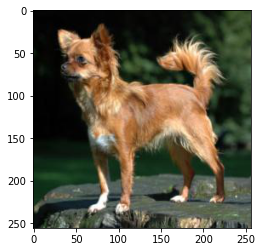

[0.10145672 0.70408124 0.75996172 0.07339834 0.15769057 0.05572629
 0.42745185 0.19763529 0.30676952 0.10714862]
Image:
(256, 256, 3)


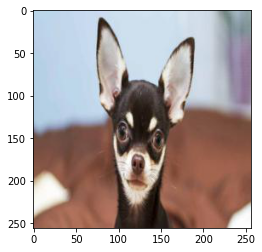

[0.26521778 1.53198338 0.84992194 0.23684855 0.14586289 0.11369801
 0.45144984 0.09844674 0.76923048 0.18753363]
Image:
(256, 256, 3)


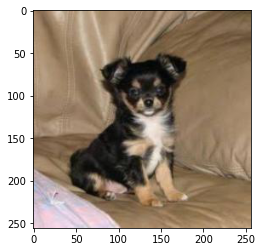

[0.25586802 1.03631294 0.93826485 0.21968383 0.10480054 0.1986323
 0.6581403  0.04625438 0.02174159 0.14413106]
Image:
(256, 256, 3)


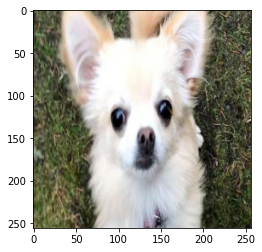

[0.04523291 0.36382753 1.49767256 0.27129275 0.16031064 0.11871687
 0.60660017 0.2874746  0.00296077 0.21254607]
Image:
(256, 256, 3)


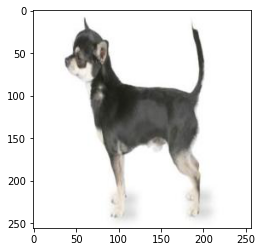

[0.02951572 0.8228665  0.28307319 0.25658825 0.44690695 0.31726733
 0.57929379 0.1297684  0.37171525 0.0687049 ]
Image:
(256, 256, 3)


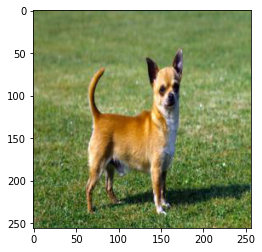

[0.01145066 0.80628473 1.44612217 0.13154313 0.25614843 0.09097107
 0.44511345 0.16788583 0.2971077  0.18054667]
Image:
(256, 256, 3)


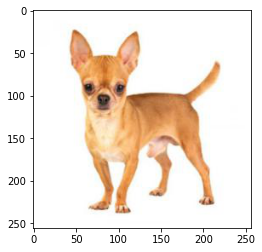

[0.         1.20258486 0.56266153 0.0984474  0.35874796 0.12259293
 0.78756839 0.0529004  0.39512867 0.05392634]
Image:
(256, 256, 3)


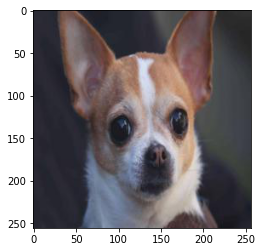

[0.11689755 1.25870478 1.74282742 0.06417441 0.03382587 0.00369902
 0.48834917 0.37119475 0.06813592 0.14102104]
Image:
(256, 256, 3)


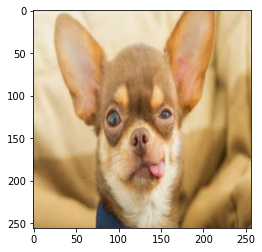

[0.0486894  1.18602765 0.9606626  0.02607338 0.11344006 0.12634806
 0.54391724 0.19551583 0.30648574 0.24986151]
Image:
(256, 256, 3)


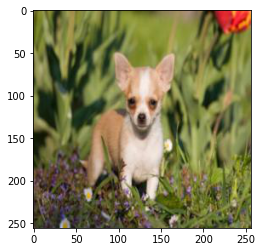

[0.00845212 0.23140433 1.05166471 0.34372681 0.12314263 0.03162736
 0.26725611 0.24567141 0.81075609 0.19029926]


In [ ]:
def show_image_in_ds(ds, idx=1):
    image = ds.images[idx].numpy()
    embedding = ds.embeddings[idx].numpy()
    print("Image:")
    print(image.shape)
    plt.imshow(image)
    plt.show()
    print(embedding[0:10]) # show only 10 first values of the image embedding

for i in range(10):
    show_image_in_ds(ds, i)

# Doing Simillar For AlexNet as well

In [ ]:
# create dataloader with required transforms 
tc = transforms.Compose([
        transforms.Resize((227, 227)),
        transforms.ToTensor()              
    ])

image_datasets = datasets.ImageFolder(data_dir, transform=tc)
dloader = torch.utils.data.DataLoader(image_datasets, batch_size=10, shuffle=False)

torch.Size([227, 227, 3])
tensor([[[0.0118, 0.0157, 0.0157,  ..., 0.1922, 0.1922, 0.1922],
         [0.0118, 0.0157, 0.0196,  ..., 0.1882, 0.1961, 0.1922],
         [0.0118, 0.0157, 0.0196,  ..., 0.1922, 0.1961, 0.1961],
         ...,
         [0.0392, 0.0353, 0.0392,  ..., 0.3961, 0.3765, 0.3569],
         [0.0314, 0.0392, 0.0353,  ..., 0.4824, 0.4510, 0.3882],
         [0.0314, 0.0314, 0.0157,  ..., 0.4745, 0.4627, 0.3882]],

        [[0.0118, 0.0157, 0.0157,  ..., 0.2941, 0.2941, 0.2941],
         [0.0118, 0.0157, 0.0196,  ..., 0.2902, 0.2980, 0.2941],
         [0.0118, 0.0157, 0.0196,  ..., 0.2902, 0.2941, 0.2941],
         ...,
         [0.0667, 0.0627, 0.0588,  ..., 0.4235, 0.3804, 0.3451],
         [0.0588, 0.0588, 0.0588,  ..., 0.4902, 0.4431, 0.3804],
         [0.0549, 0.0471, 0.0549,  ..., 0.4627, 0.4471, 0.3922]],

        [[0.0118, 0.0157, 0.0157,  ..., 0.1529, 0.1529, 0.1490],
         [0.0118, 0.0157, 0.0196,  ..., 0.1569, 0.1608, 0.1569],
         [0.0118, 0.0157, 0.0196

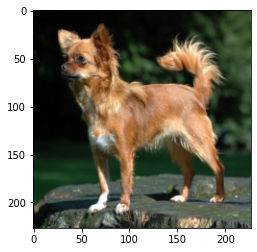

In [ ]:
for img, label in dloader:
  print(np.transpose(img[0], (1,2,0)).shape)
  print(img[0])
  plt.imshow((img[0].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
  plt.show()
  break

In [ ]:
def copy_embeddings(m, i, o):
    """Copy embeddings from the penultimate layer.
    """
    o = o[:, :, 0, 0].detach().numpy().tolist()
    outputs.append(o)

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:

layer = model._modules.get('avgpool')
_ = layer.register_forward_hook(copy_embeddings)

outputs = []  

model.eval() 

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# Generate image's embeddings for all images in dloader and saves 
for X, y in dloader:
    _ = model(X)

In [ ]:
# flatten list of embeddings to remove batches
list_embeddings = [item for sublist in outputs for item in sublist]
print(len(list_embeddings))

455


In [ ]:
assert len(list_embeddings) == len(image_datasets)

In [ ]:
np.array(list_embeddings[0]).shape

(256,)

In [ ]:
!activeloop login -u shawmoon -p activeloop786

Successfully logged in to Activeloop.


In [ ]:
#Creating a New Hub folder
with hub.empty('./dog2_deeplake') as ds:
     
    ds.create_tensor('images', htype = 'image', sample_compression = 'jpeg')
    ds.create_tensor('embeddings')

    ds.info.update(description = 'Dog breeds embeddings dataset')
    ds.images.info.update(camera_type = 'SLR')
    
  
    for i in tqdm(range(len(image_datasets))):
      img = image_datasets[i][0].detach().numpy().transpose(1, 2, 0)
      img = img * 255 
      img = img.astype(np.uint8)
      ds.images.append(img) 
      ds.embeddings.append(list_embeddings[i]) 

100%|██████████| 455/455 [00:13<00:00, 34.14it/s]


# Final Output of the 10 nearest neighbor images of the given Image using Image Embedding

Image:
(227, 227, 3)


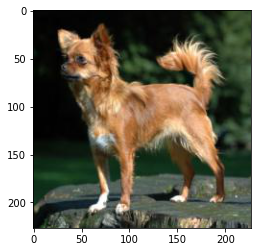

[0.         0.         0.         0.         0.         0.21544865
 0.         0.         0.         0.        ]
Image:
(227, 227, 3)


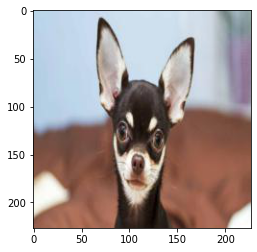

[0.         0.         0.         0.         0.         0.00069024
 0.         0.         0.         0.        ]
Image:
(227, 227, 3)


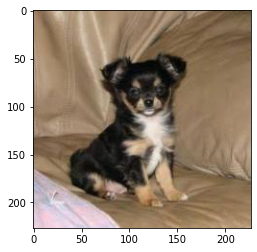

[0.         0.         0.         0.         0.         0.
 1.56812847 0.         0.         0.        ]
Image:
(227, 227, 3)


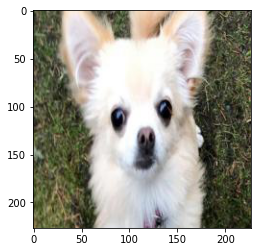

[0.43643871 0.74392253 0.         1.24736953 0.         0.
 2.57539439 1.68568301 0.         0.        ]
Image:
(227, 227, 3)


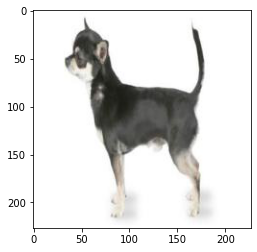

[0.         0.         1.52184892 0.         0.         2.05001092
 0.48451015 0.         0.         0.        ]
Image:
(227, 227, 3)


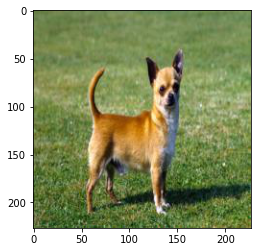

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Image:
(227, 227, 3)


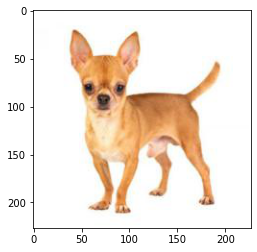

[1.42462814 0.         0.         0.         0.         2.39675307
 0.         0.         0.         0.        ]
Image:
(227, 227, 3)


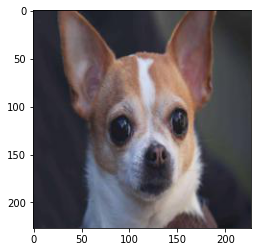

[0.         0.         0.         0.         0.         0.
 0.41105703 0.34872171 0.         0.        ]
Image:
(227, 227, 3)


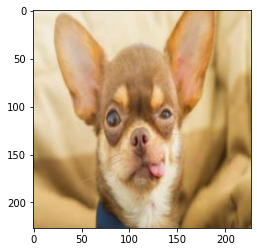

[0.         0.         0.         0.         0.         1.30156076
 3.25952077 0.         0.         0.        ]
Image:
(227, 227, 3)


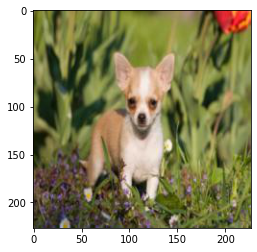

[0.         0.13351397 0.         0.02277862 0.         0.
 0.         0.         1.21417987 0.        ]


In [ ]:
def show_image_in_ds(ds, idx=1):
    image = ds.images[idx].numpy()
    embedding = ds.embeddings[idx].numpy()
    print("Image:")
    print(image.shape)
    plt.imshow(image)
    plt.show()
    print(embedding[0:10]) # show only 10 first values of the image embedding

for i in range(10):
    show_image_in_ds(ds, i)